## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0 , 20 )
Y = -2 * X + 1

#### Plot your data points. 

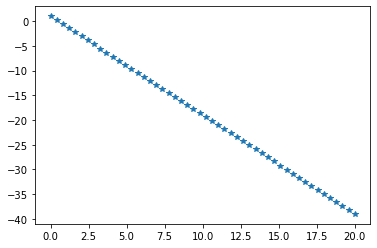

In [3]:
plt.plot(X,Y , "*")

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [43]:
def GD( X , Y , alpha , itterations):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0   
  
  for i in range(itterations):
    h = theta_0 + theta_1 * X
    h_list.append(h)
    
    m = len(X)

    cost = (1/2*m) * np.sum( (h - Y)**2 )

    cost_list.append(cost)

    diff_theta_0 = (1/m) * np.sum( h - Y ) 
    diff_theta_1 = (1/m) * np.sum( (h - Y) * X )

    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1

    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    
    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.1:
        print(f"Stopped after {i} itterations ")
        break

  
  return h_list , cost_list , theta_0_list ,theta_1_list 

In [44]:
h_list , cost_list , theta_0_list ,theta_1_list = GD( X , Y , 0.01 , 1000)
print(h_list[-1])
print(Y)

Stopped after 420 itterations 
[  0.61096459  -0.19355053  -0.99806564  -1.80258076  -2.60709587
  -3.41161099  -4.21612611  -5.02064122  -5.82515634  -6.62967145
  -7.43418657  -8.23870168  -9.0432168   -9.84773192 -10.65224703
 -11.45676215 -12.26127726 -13.06579238 -13.8703075  -14.67482261
 -15.47933773 -16.28385284 -17.08836796 -17.89288307 -18.69739819
 -19.50191331 -20.30642842 -21.11094354 -21.91545865 -22.71997377
 -23.52448888 -24.329004   -25.13351912 -25.93803423 -26.74254935
 -27.54706446 -28.35157958 -29.1560947  -29.96060981 -30.76512493
 -31.56964004 -32.37415516 -33.17867027 -33.98318539 -34.78770051
 -35.59221562 -36.39673074 -37.20124585 -38.00576097 -38.81027608]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.

In [45]:
from sklearn.metrics import r2_score
r2_score(Y,  h_list[-1])

0.9997190849764307

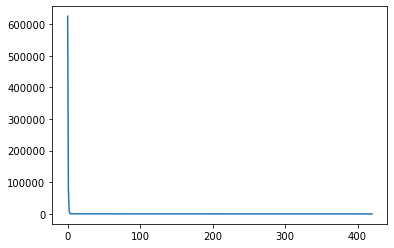

In [46]:
plt.plot(cost_list)

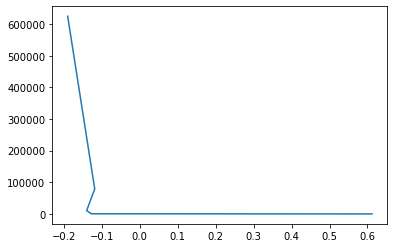

In [47]:
plt.plot(theta_0_list,cost_list)

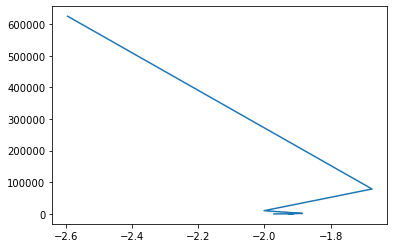

In [48]:
plt.plot(theta_1_list,cost_list)

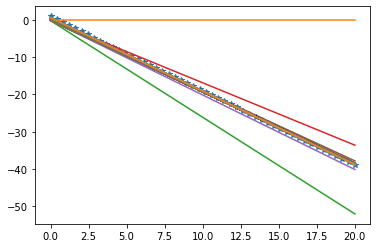

In [49]:
plt.plot(X,Y , "*")
for i in h_list:
  plt.plot(X,i)
plt.show()

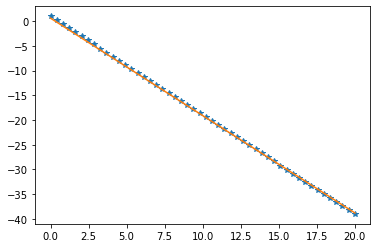

In [50]:
plt.plot(X,Y , "*")
plt.plot(X,h_list[-1])
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

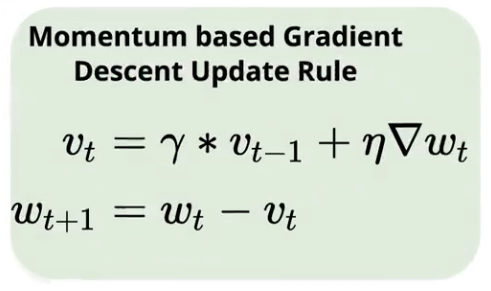

#### γ takes values between 0 and 1.
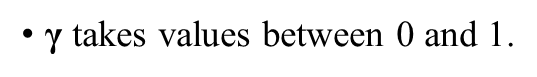

In [34]:
def GD_Momentum( X , Y , alpha , gamma , itterations):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0
  v0 = 0
  v1 = 0
    
  
  for i in range(itterations):
    h = theta_0 + theta_1 * X
    h_list.append(h)
    
    m = len(X)

    cost = (1/(2*m)) * np.sum( (h - Y)**2 )

    cost_list.append(cost)

    diff_theta_0 = (1/m) * np.sum( h - Y ) 
    diff_theta_1 = (1/m) * np.sum( (h - Y) * X )
    v0 = v0 *gamma + alpha*diff_theta_0
    v1 = v1 *gamma + alpha*diff_theta_1


    theta_0 = theta_0 - v0
    theta_1 = theta_1 - v1

    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    
    if ( diff_theta_0**2 + diff_theta_1**2 )**0.5 < 0.1:
      print (f'Stopped after {i} itterations')
      break

  return h_list , cost_list , theta_0_list ,theta_1_list 

In [54]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Momentum( X , Y , alpha = 0.01 , gamma = 0.7 , itterations = 1000)
print(h_list[-1])
print(Y)

Stopped after 126 itterations
[  0.61275557  -0.19181392  -0.99638341  -1.8009529   -2.6055224
  -3.41009189  -4.21466138  -5.01923087  -5.82380036  -6.62836985
  -7.43293935  -8.23750884  -9.04207833  -9.84664782 -10.65121731
 -11.4557868  -12.26035629 -13.06492579 -13.86949528 -14.67406477
 -15.47863426 -16.28320375 -17.08777324 -17.89234273 -18.69691223
 -19.50148172 -20.30605121 -21.1106207  -21.91519019 -22.71975968
 -23.52432917 -24.32889867 -25.13346816 -25.93803765 -26.74260714
 -27.54717663 -28.35174612 -29.15631562 -29.96088511 -30.7654546
 -31.57002409 -32.37459358 -33.17916307 -33.98373256 -34.78830206
 -35.59287155 -36.39744104 -37.20201053 -38.00658002 -38.81114951]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.775

In [36]:
from sklearn.metrics import r2_score
r2_score(Y,  h_list[-1])

0.9997216654894242

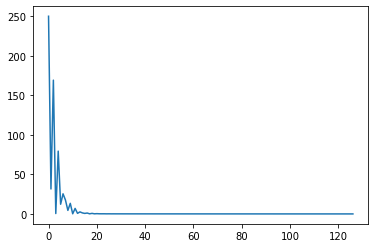

In [37]:
plt.plot(cost_list)

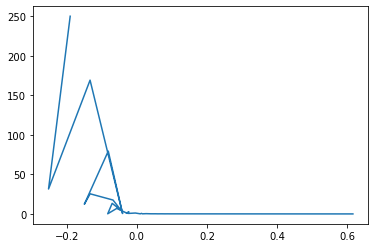

In [38]:
plt.plot(theta_0_list,cost_list)

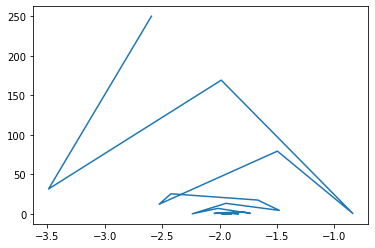

In [39]:
plt.plot(theta_1_list,cost_list)

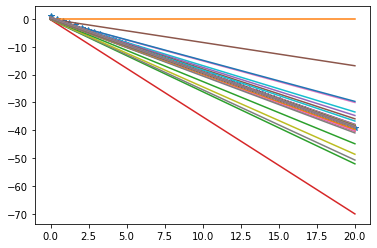

In [40]:
plt.plot(X,Y , "*")
for i in h_list:
  plt.plot(X,i)
plt.show()

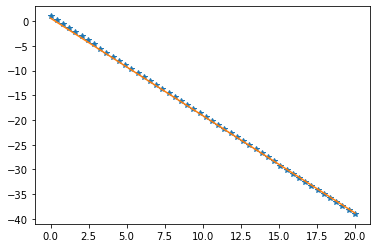

In [41]:
plt.plot(X,Y , "*")
plt.plot(X,h_list[-1])
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [74]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Momentum( X , Y , alpha = 0.01 , gamma = 0.99 , itterations = 1000)
print('Score = ',r2_score(Y,  h_list[-1]))

Stopped after 200 itterations
Score =  0.9997778173044527


In [69]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Momentum( X , Y , alpha = 0.01 , gamma = 0.5 , itterations = 1000)
print('Score = ',r2_score(Y,  h_list[-1]))

Stopped after 210 itterations
Score =  0.999720076619046


In [68]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Momentum( X , Y , alpha = 0.01 , gamma = 10e-5 , itterations = 1000)
print('Score = ',r2_score(Y,  h_list[-1]))

Stopped after 420 itterations
Score =  0.9997191455881768


### Update your Batch GD for one variable  implementation to be NAG and check your results

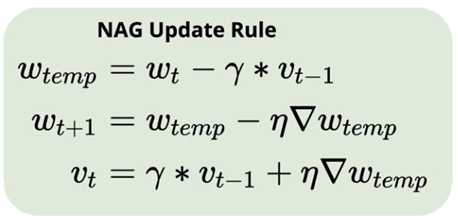

In [78]:
def GD_NAG( X , Y , alpha ,gamma, itterations):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0
  v0 = 0
  v1 = 0
    
  
  for i in range(itterations):
    h = theta_0 + theta_1 * X
    h_list.append(h)
    
    m = len(X)

    cost = (1/(2*m)) * np.sum( (h - Y)**2 )

    cost_list.append(cost)
    theta_0_temp = theta_0 - gamma*v0
    theta_1_temp = theta_1 - gamma*v1

    h_temp = theta_0_temp + theta_1_temp * X
    
    diff_theta_temp_0 = (1/m) * np.sum( h_temp - Y ) 

    diff_theta_temp_1 = (1/m) * np.sum( (h_temp - Y) * X )

    


    theta_0 = theta_0_temp - alpha * diff_theta_temp_0
    theta_1 = theta_1_temp - alpha * diff_theta_temp_1

    v0 = gamma * v0 + alpha * diff_theta_temp_0
    v1 = gamma * v1 + alpha * diff_theta_temp_1

    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    if ( diff_theta_temp_0**2 + diff_theta_temp_1**2 )**0.5 < 0.1:
      print (f'Stopped after {i} itterations')
      break


  return h_list , cost_list , theta_0_list ,theta_1_list 


In [79]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_NAG( X , Y , 0.01 , 0.8 , 1000)
print(h_list[-1])
print(Y)

Stopped after 135 itterations
[ 8.03746973e-01 -6.71363989e-03 -8.17174252e-01 -1.62763487e+00
 -2.43809548e+00 -3.24855609e+00 -4.05901670e+00 -4.86947732e+00
 -5.67993793e+00 -6.49039854e+00 -7.30085915e+00 -8.11131977e+00
 -8.92178038e+00 -9.73224099e+00 -1.05427016e+01 -1.13531622e+01
 -1.21636228e+01 -1.29740834e+01 -1.37845441e+01 -1.45950047e+01
 -1.54054653e+01 -1.62159259e+01 -1.70263865e+01 -1.78368471e+01
 -1.86473077e+01 -1.94577683e+01 -2.02682290e+01 -2.10786896e+01
 -2.18891502e+01 -2.26996108e+01 -2.35100714e+01 -2.43205320e+01
 -2.51309926e+01 -2.59414532e+01 -2.67519139e+01 -2.75623745e+01
 -2.83728351e+01 -2.91832957e+01 -2.99937563e+01 -3.08042169e+01
 -3.16146775e+01 -3.24251381e+01 -3.32355988e+01 -3.40460594e+01
 -3.48565200e+01 -3.56669806e+01 -3.64774412e+01 -3.72879018e+01
 -3.80983624e+01 -3.89088230e+01]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.979591

In [80]:
from sklearn.metrics import r2_score
r2_score(Y,  h_list[-1])

0.9999284750008353

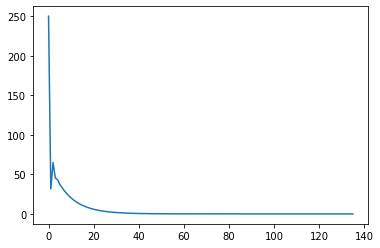

In [81]:
plt.plot(cost_list)

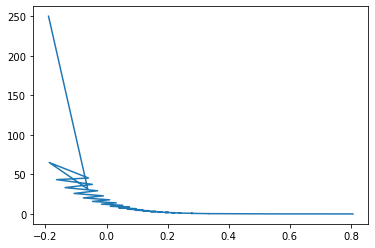

In [82]:
plt.plot(theta_0_list,cost_list)

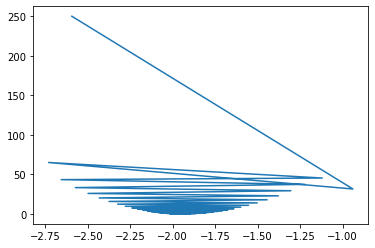

In [83]:
plt.plot(theta_1_list,cost_list)

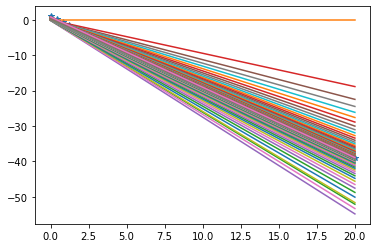

In [84]:
plt.plot(X,Y , "*")
for i in h_list:
  plt.plot(X,i)
plt.show()

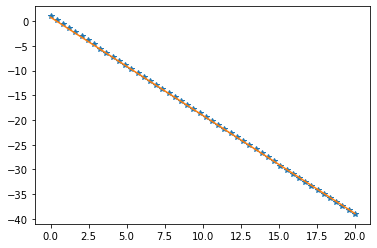

In [85]:
plt.plot(X,Y , "*")
plt.plot(X,h_list[-1])
plt.show()